In [1]:
library(ggplot2)

Exercise 1 -Discrete random varaible


$$P(k)=\frac{\lambda^{k} e^{-\lambda}}{k !\left(1-e^{-\lambda}\right)} \quad \text { for } \quad k=1,2,3, \ldots$$


1) Write the R functions for the probability density and cumulative distribution functions, using the
R naming convention

In [2]:
dPoisson <- function (k, lambda){
    return((lambda**k * exp(-lambda)) / (factorial(k)*(1 - exp(-lambda))))
}



#pPoisson <- function(k, lambda){
   # return(cumsum(dPoisson(k,lambda)))
#}

cumulative <- function(pdf){
    cdf <- c()
    y<-pdf
    for (n in (1:length(y))){
        cdf <- append(cdf,sum(y[1:n]))
    }
    return(cdf)
}

pPoisson <- function(k, lambda){
    return(cumulative(dPoisson(k,lambda)))
}



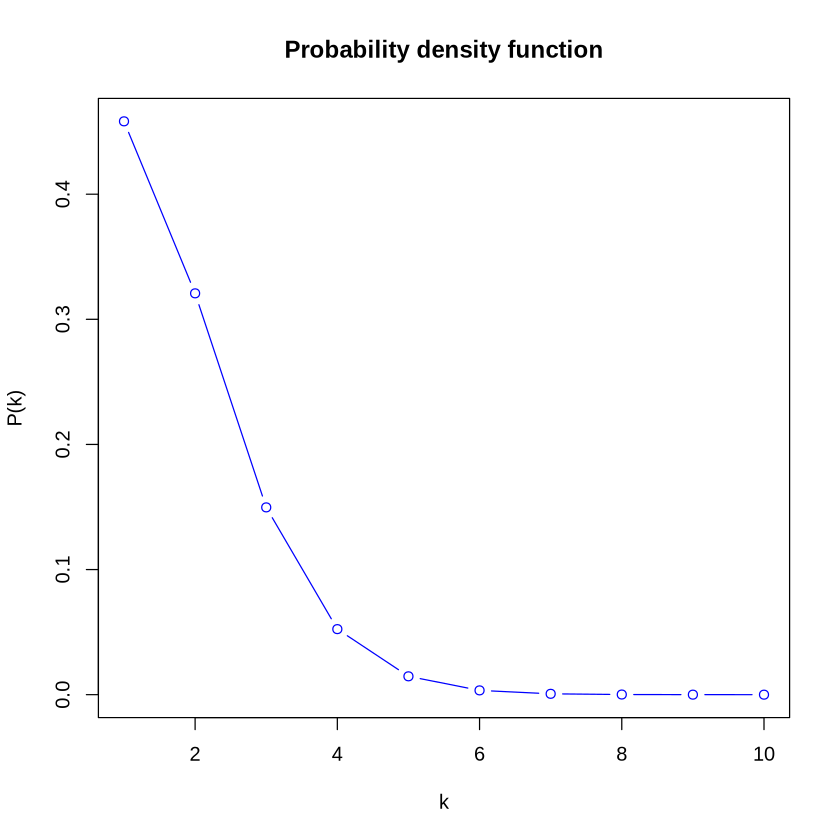

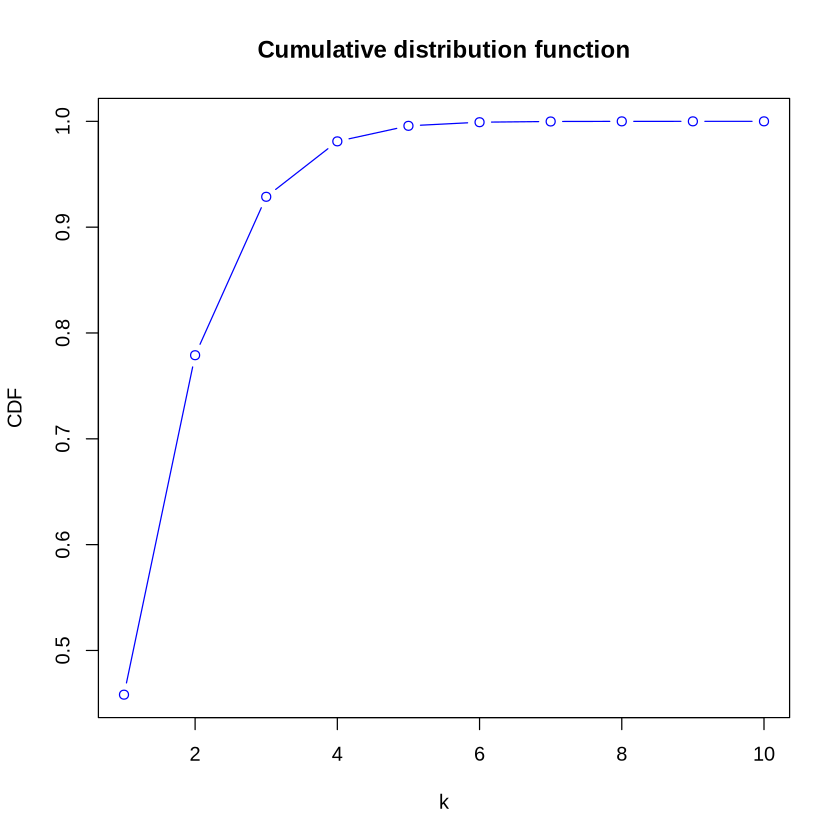

In [3]:
lambda <- 1.4
#k <- seq(0,1,by=0.01)
k <- seq(10)

plot(k,dPoisson(k,1.4), type = "b", col = "blue", ylab = "P(k)", main = "Probability density function")
plot(k,pPoisson(k,1.4), type = "b", col = "blue", ylab = "CDF", main = "Cumulative distribution function")
#plot(k,cumulative(dPoisson(k,lambda)))

In [4]:
k_mean <- sum(k*dPoisson(k,lambda))
print(paste("Mean:",k_mean))

#mean <- ((lambda*exp(lambda))/(exp(lambda)-1))
#mean

k_var <- k_mean*(1+lambda-k_mean)
print(paste("Variance:", k_var))

#var <- (sum((k**2)*dPoisson(k,lambda))-k_mean**2)
#var


[1] "Mean: 1.85823096683069"
[1] "Variance: 1.00673199430514"


4) Generate a sample of random numbers from this distribution and show them in an histogram.
Evaluate the sample mean

[1] "Sample mean:  1.8612"


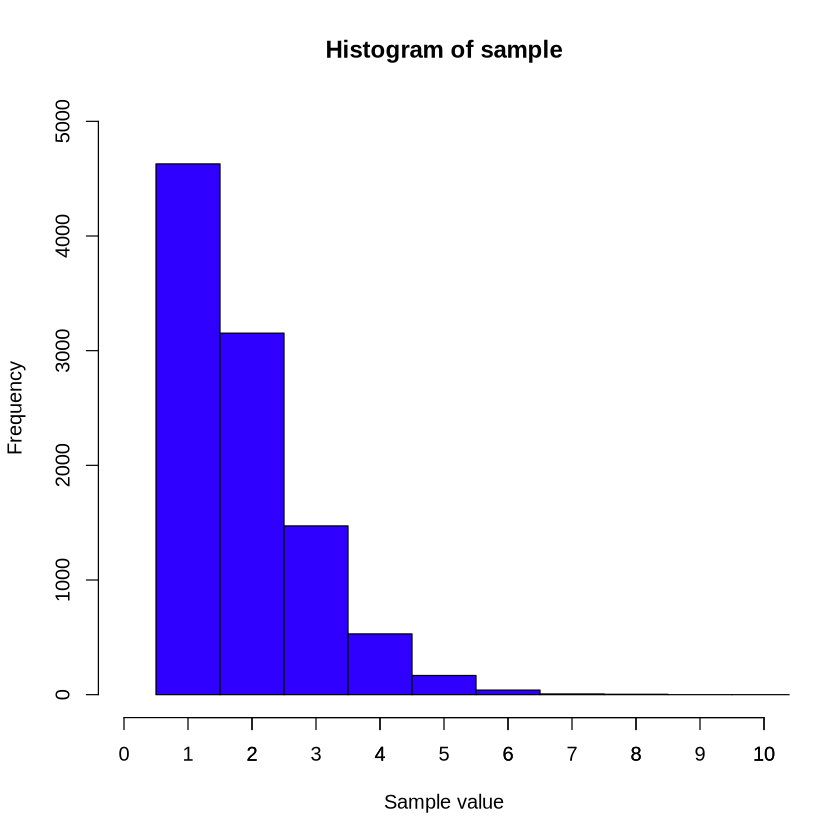

In [5]:
sample <- sample(1:10,10000, replace=T, prob=dPoisson(1:10,lambda))
breaks <- seq(0.5,10.5,by=1)
hist <- hist(sample,col='#2f00ff', ylim = c(0,5000), xlim = c(0,10), xlab = "Sample value", breaks = breaks)
axis(side = 1, at = 1:10, labels = 1:10)
mean <- mean(sample)
print(paste("Sample mean: ", mean))

Exercise 2 - Continuos random variable

$$p(E)=N \begin{cases}1 & \text { for } E<E_{0} \\ \left(E-E_{0}+1\right)^{-\gamma} & \text { for } E \geq E_{0}\end{cases}$$

where $E_0 = 7.25 GeV$ and $\gamma = 2.7$.

1) Compute the normalisation factor N using R.

In [6]:
## Firts I set the constants' value:
E0<-7.25 #GeV
gamma <- 2.7

P_not_norm<-function(E){
    E0<-7.25 #GeV
    gamma <- 2.7
    return(ifelse(E < E0,1,(E - E0 + 1)**(-gamma)))
}


integral <- integrate(P_not_norm,lower=0,upper=Inf)
N <- 1/integral$value
print(paste("Normalization factor:",N))

P_muons<-function(E){
    E0<-7.25 #GeV
    gamma <- 2.7
    N <- 1/7.83823739142009
    return(ifelse(E < E0,N,N*(E - E0 + 1)**(-gamma)))
}

[1] "Normalization factor: 0.127579703198913"


b) Plot the probability density function in R

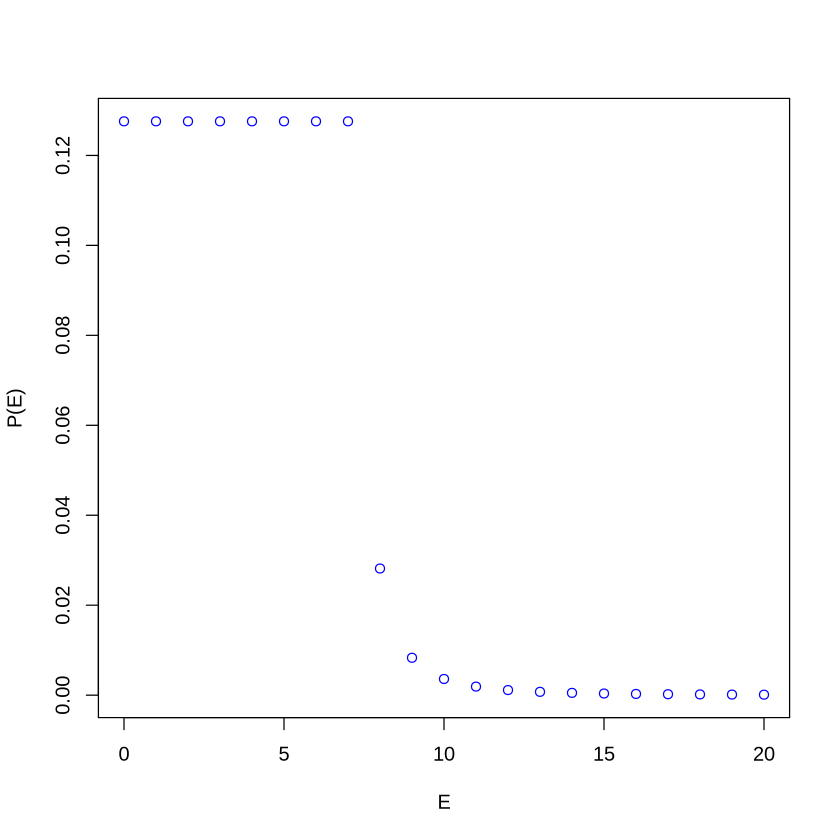

In [7]:
E<-seq(0,20,by=1)
plot(E,P_muons(E), col = "blue", ylab = "P(E)", xlab = "E" )

c) Plot the cumulative density function in R

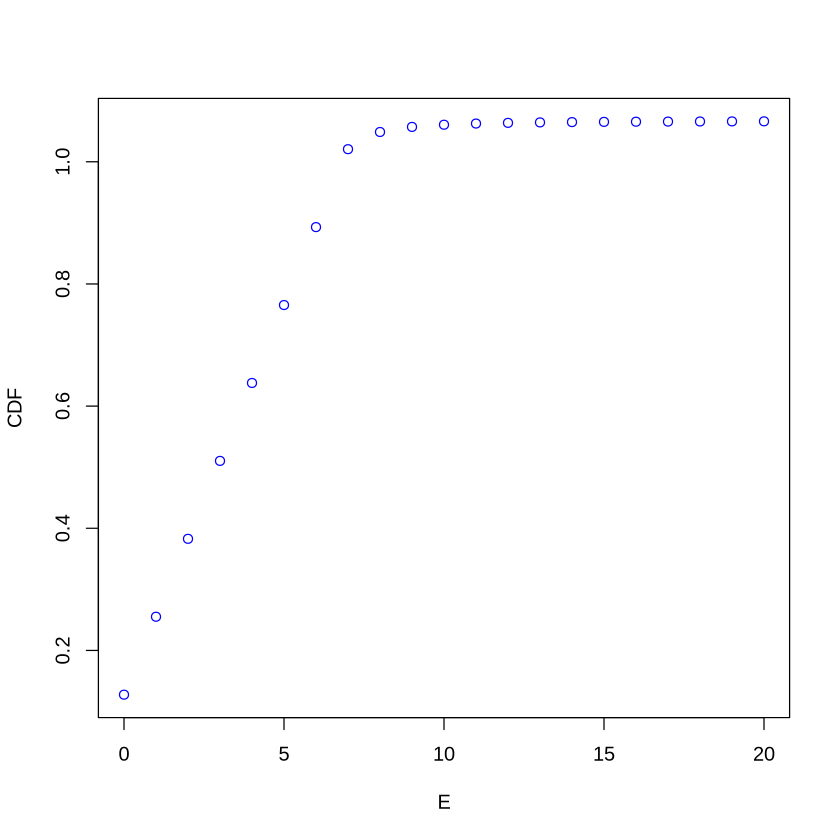

In [8]:
plot(E,cumulative(P_muons(E)), col = "blue", ylab = "CDF", xlab = "E" )

d) Compute the mean value using R

In [9]:
e_mean <- function(E){
    return(E*P_muons(E))
}
E_mean <- integrate(f=e_mean,0,Inf)$value
print(paste("Mean value of P(E):", E_mean))

[1] "Mean value of P(E): 4.0042508046789"


# Exercise 3 #

Suppose that the average number of accidents at an intersection is two per day.

a) Using Markov’s inequality, find a bound for the probability that at least five accidents will occur
tomorrow.

Markov's inequality:
$$P(X \geq a) \leq \frac{E(X)}{a}$$

In [10]:
P_markov <- function(a, E){
    # E is the expected value for X (E(X))
    return(E / a)
}

print(paste("The lower bound for the probability of having at least 5 accidents at an intersection in a day is:",
     P_markov(a = 5, E = 2)))

[1] "The lower bound for the probability of having at least 5 accidents at an intersection in a day is: 0.4"


b) Using Poisson random variables, calculate the probability that at least five accidents will occur
tomorrow. Compare this value with the bound obtained in the previous point a)

In [11]:
p <- 1 - sum(dpois(x = 0:4, lambda = 2))
print(paste("Probability that at least 5 accidents will occur tomorrow:", p))

[1] "Probability that at least 5 accidents will occur tomorrow: 0.0526530173437111"


As expected, whne using a Poissonian distribution the probability of having at least 5 accidents in a day is very low, if compared to the one of a generic random variable, such as expressed in Markov's inequality. 

c) Let the variance of the number of accidents be two per day. Using Chebyshev’s inequality, find a
bound on the probability that tomorrow at least five accidents will occur.

$$Pr(|X - \mu|\geq k\sigma) \leq \frac{1}{k^2}$$ 

We want to have that $|X-\mu| \geq 3$ where $\sigma = \sqrt{2}$. Therefore, $k\sigma \geq 3$ and thus $k \geq \frac{3}{\sqrt{2}}$. 
Hence, $P(|X-\mu|\geq 3) \leq \frac{1}{(\frac{3}{\sqrt{2}})^2} = 0.222222222222222 .$ 

In [12]:
cheb <- function(X, mu, var){
    return((sqrt(var) / abs(X - mu))**2)
}

print(paste("Probability that at least five accidents occur tomorrow:", cheb(X = 5, mu = 2, var = 2)))

[1] "Probability that at least five accidents occur tomorrow: 0.222222222222222"


# Exercise 4 #

Question: the waiting period from the time a book is ordered until it is received is a random variable with mean 
seven days and standard deviation two days. If Helen wants to be 95% sure that she receives a book by
certain date, how early should she order the book?

If we suppose a normal distribution:

In [13]:
mean <- 7
std <- 2
confidence <- 0.95

x <- qnorm(confidence, mean, std)
print(paste("Helen should order the book at least", ceiling(x), "days before she wants to receive it."))

[1] "Helen should order the book at least 11 days before she wants to receive it."


# Exercise 5 #

Question: an ordinary deck of 52 cards is divided randomly into 26 pairs. Using Chebyshev’s inequality, find
an upper bound for the probability that, at most, 10 pairs consist of a black and a red card.

Chebyshev's inequality:

$$Pr(|X - \mu|\geq k\sigma) \leq \frac{1}{k^2}$$ 

Since the studied process is a Bernoulli process, we can compute mean and variance through the associated relation, which are:

$$E[x] = p $$
$$Var[x] = p(1-p) $$
where x is a variable that follows Bernoulli distribution. \
Then, we use Chebyshev's inequality to find the upper bound for the probability of the given case.

In [14]:
X <- 10 
p <- 1 / 2

#I compute mean and variance for the number of different colors pairs in a deck
mu <- p * 26
var <- p * (1 - p) * 26

print(paste("The upper bound for the probability of having at most 10 pairs with cards of different colors is", cheb(X, mu, var)))

[1] "The upper bound for the probability of having at most 10 pairs with cards of different colors is 0.722222222222222"


# Exercise 6 #

Question: in a stationary bus at the departure station, a passenger gets on the bus, on average every 30
seconds.

a) Compute the probability of getting more than 6 passenger after 2 minutes. Evaluate the probability
of having less than 4 passenger after 3 minutes. 

The average number of passangers on the bus after 2 minutes (120 seconds) is given by $\frac{120}{30} = 4 $ passengers, while after 3 minutes is 6.\
If we assume a Poisson distribution, then we can compute the requested probabilities:

In [15]:
lambda1 <- 4
n_pass1 <- 7
p <- dpois(n_pass1, lambda1)
print(paste("The probability of having more than 6 passengers on the bus after 2 minutes is", p, "."))

lambda2 <- 6
n_pass2 <- 3
p <- dpois(n_pass2, lambda2)
print(paste("The probability of having less than 4 passengers on the bus after 3 minutes is", p, "."))

[1] "The probability of having more than 6 passengers on the bus after 2 minutes is 0.0595403626097264 ."
[1] "The probability of having less than 4 passengers on the bus after 3 minutes is 0.0892350783599889 ."


b) Simulate the distribution of the arrival time of the third passenger and superimpose the corresponding pdf. 

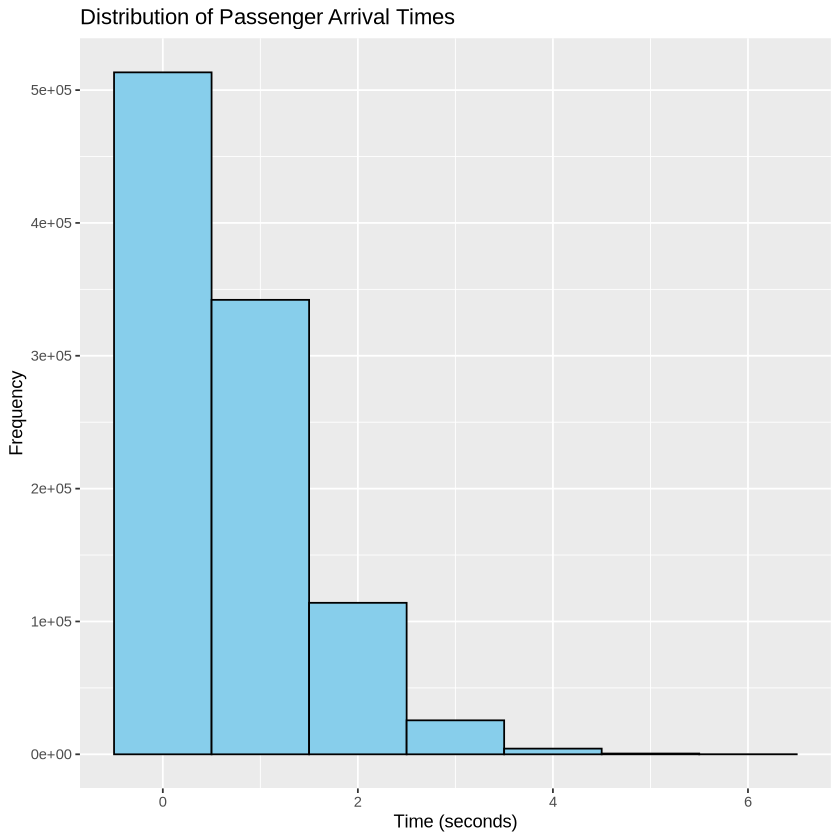

In [20]:
data <- data.frame(arrivals)
ggplot(data, mapping = aes(x = arrivals)) +
    geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
    stat_function(fun = function(x) dexp(x, rate = 1/30), color = "red", size = 1) +
    labs(x = "Arrival time(seconds)",
        y = "Frequency",
        title = "Third passenger arrival time distribution")

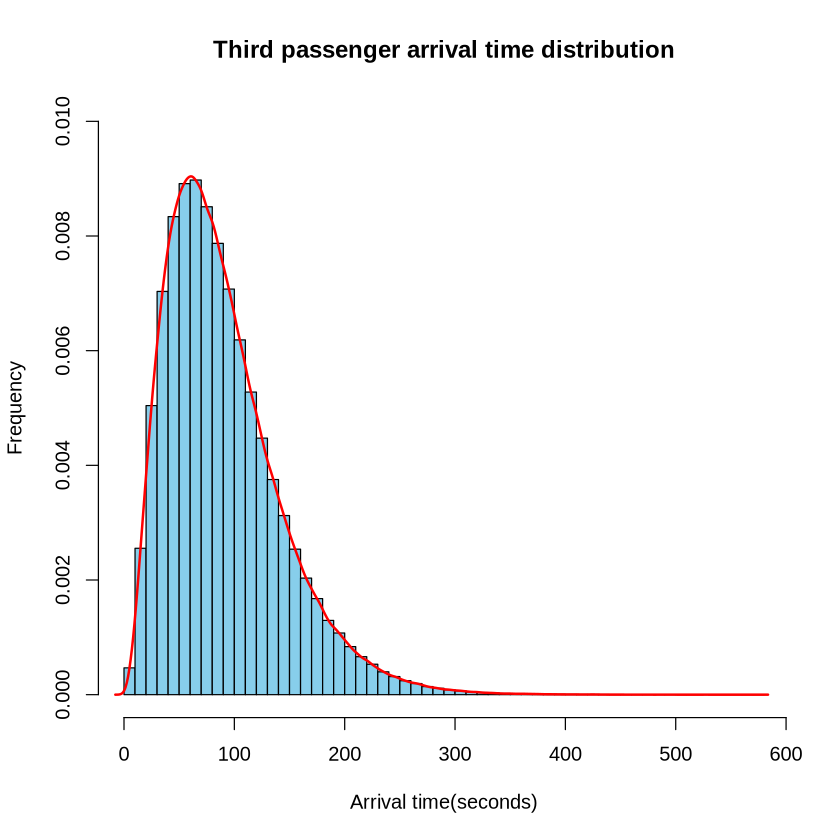

In [80]:
nobs <- 1e6
times_third <- function(){
    times <- rexp(n = 3, rate = 1 / 30)
    return(sum(times))
}

arrivals <- replicate(nobs, times_third())

hist(x = arrivals,
    freq = FALSE,
    breaks = 70,
    xlab = "Arrival time(seconds)",
    ylab = "Frequency",
    main = "Third passenger arrival time distribution",
    col = "skyblue",
    ylim = c(0,0.010))
lines(density(arrivals), col = "red", lwd = 2)

c) Repeat the procedure of the point b) for the difference in arrival time between the fifth and the
first passenger. 

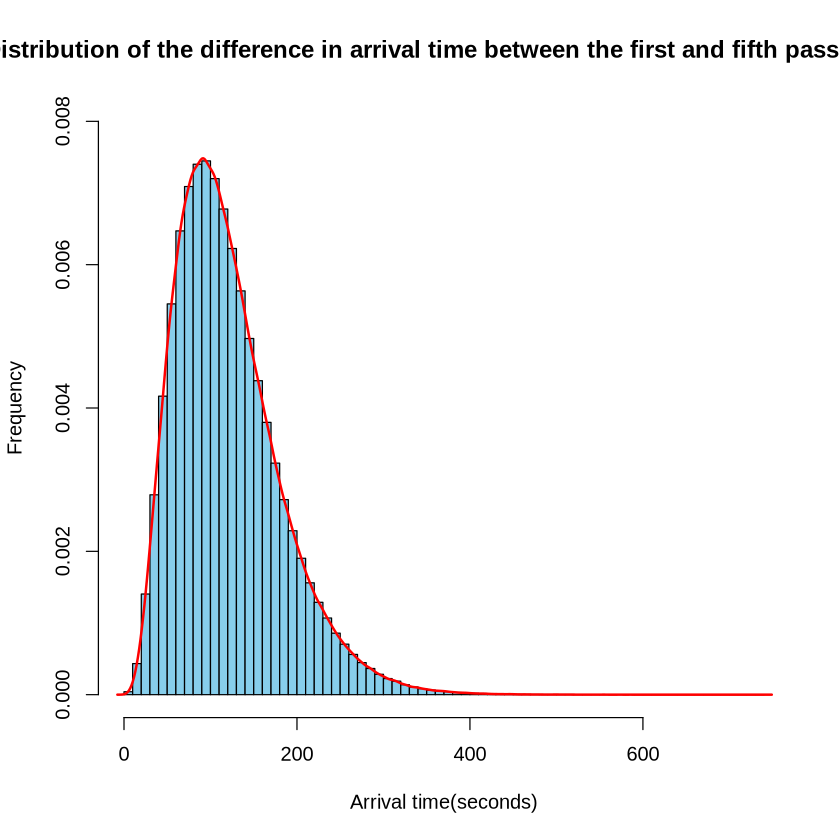

In [86]:
nobs <- 1e6
diff <- function(){
    times <- rexp(n = 5, rate = 1 / 30)
    return(sum(times) - times[1])
}

differences <- replicate(nobs, diff())

hist(x = differences,
    freq = FALSE,
    breaks = 70,
    xlab = "Arrival time(seconds)",
    ylab = "Frequency",
    main = "Distribution of the difference in arrival time between the first and fifth passenger",
    col = "skyblue",
    ylim = c(0,0.008))
lines(density(differences), col = "red", lwd = 2)